# Project 10 => Zomato Restaurant

Project Description:

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:

This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range

Hint : Use pandas methods to combine all the datasets and then start working on this project.

Dataset Link:

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Z_Restaurant/Country-Code.xlsx
•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv

In [9]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_csv(r"C:\Users\91832\Downloads\archive (1)\zomato.csv",encoding ='latin-1')

In [8]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [14]:
df_countries = pd.read_excel(r"C:\Users\91832\Downloads\archive (1)\Country-Code.xlsx")

In [15]:
df_countries.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [16]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [17]:
df_countries.describe()

,Country Code
count,15.000000
mean,137.933333
std,80.009345
min,1.000000
25%,65.500000
50%,166.000000
75%,199.500000
max,216.000000


In [18]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [19]:
df_final = pd.merge(df,df_countries,on='Country Code',how='left')

In [20]:
df_final.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [21]:
df_final.Country.value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [22]:
country_names = df_final.Country.value_counts().index

In [31]:
df_final.Country.value_counts().value_counts

<bound method IndexOpsMixin.value_counts of India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64>

In [23]:
df_final.Country.value_counts().values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

In [24]:
country_val=df_final.Country.value_counts().values

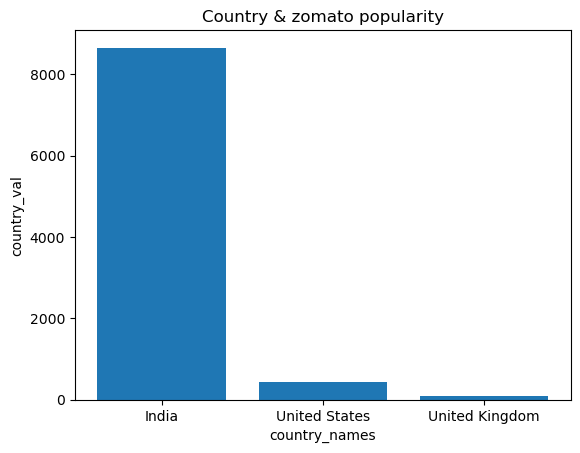

In [25]:
#plot a bar chart
plt.bar(country_names[:3],country_val[:3])
# Adding labels and title
plt.xlabel('country_names')
plt.ylabel('country_val')
plt.title('Country & zomato popularity')

# Display the plot
plt.show()

([<matplotlib.patches.Wedge at 0x2f4465a66d0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

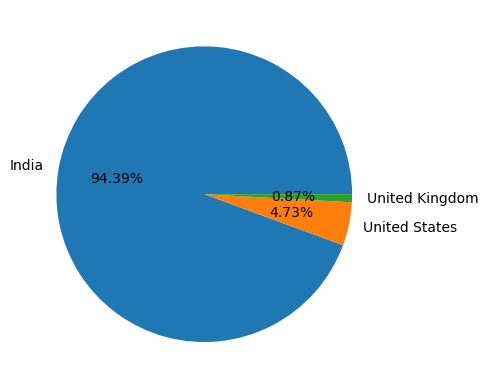

In [26]:
plt.pie(country_val[:3],labels = country_names[:3],autopct='%1.2f%%')

OBSERVATION :
Zomato maxium sales in India and after that USA and then United Kingdom

In [27]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [53]:
df_final.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [28]:
#convert the above data into dataframe
df_final.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating count'})

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [29]:
ratings = df_final.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating count'})

In [60]:
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


### OBSERVATIONS
RATING 4.5 - 4.9 --->EXCELLENT
RATING 4.0 - 4.4 --->VERY GOOD
RATING 3.5 - 3.9 --->GOOD
RATING 2.5 - 3.4 --->AVERAGE
RATING 1.8 - 2.4 --->POOR
RATING 0.0 ---> NOT RATED

<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

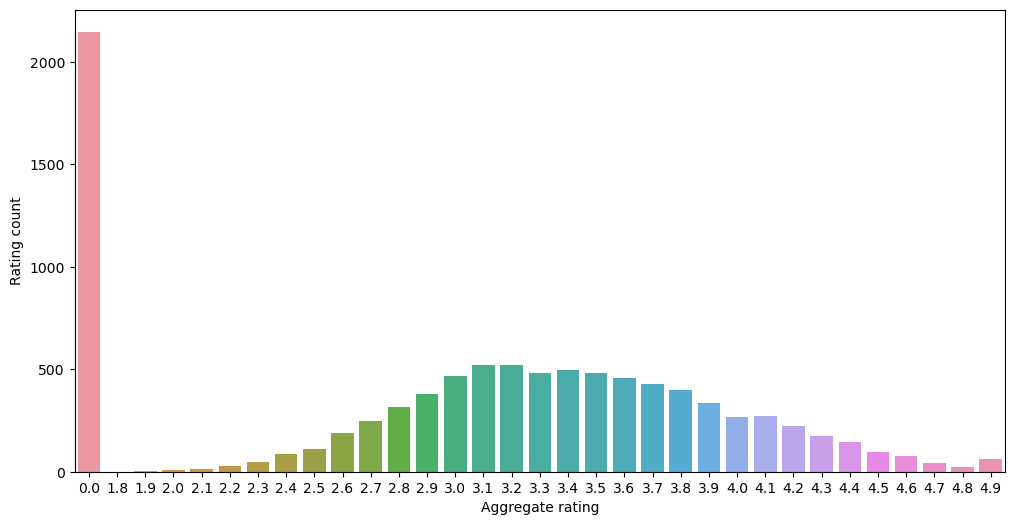

In [64]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating count',data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

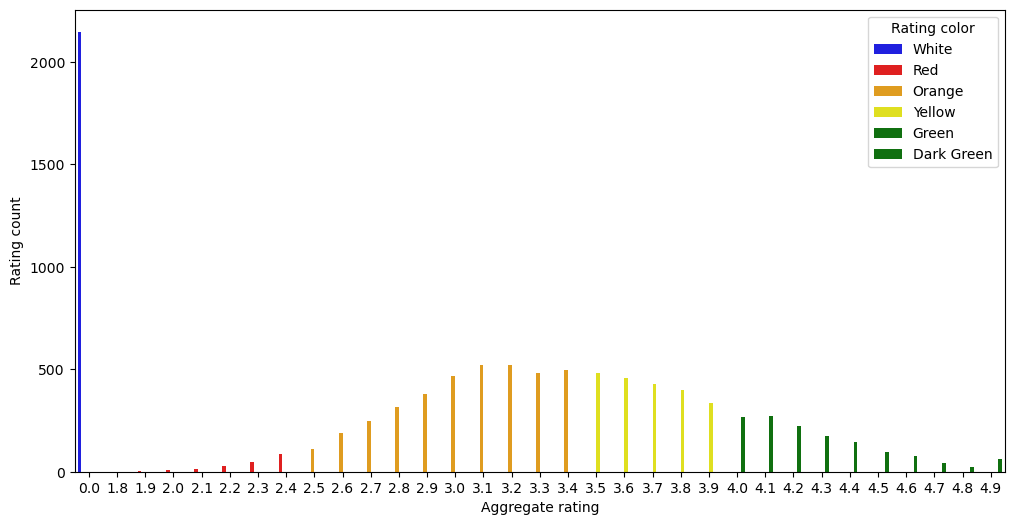

In [68]:
sns.barplot(x='Aggregate rating',y='Rating count',hue ='Rating color', data=ratings, palette=['blue','red','orange','yellow','green','green'])

In [71]:
### find the countries name that has given zero ratings
df_final[df_final['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [32]:
## Which countries do have online deliveries option
df_final[df_final['Has Online delivery']=="yes"].Country.value_counts()

Series([], Name: Country, dtype: int64)

In [34]:
df_final[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


## OBSERVATIONS:
1. Online deliveries are only available in INDIA and UAE.

In [35]:
#Create pie chart for top 5 cities distribution
df_final.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [36]:
df_final.City.value_counts().values

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

In [37]:
city_labels = df_final.City.value_counts().index
city_values = df_final.City.value_counts().values

([<matplotlib.patches.Wedge at 0x2f4496c5c90>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

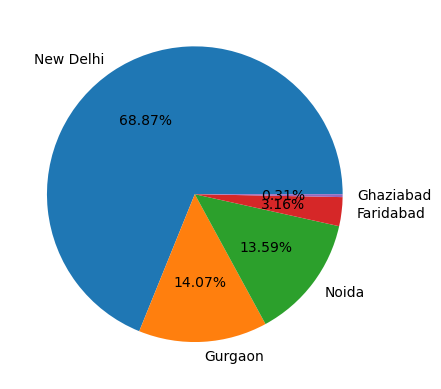

In [42]:
plt.pie(city_values[:5],labels = city_labels[:5],autopct='%1.2f%%')

In [45]:
# find the top 5 cuisines
df_final.Cuisines.value_counts().index

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       ...
       'Cafe, Pizza, Burger',
       'Healthy Food, Continental, Juices, Beverages, Italian, Salad, Lebanese',
       'Goan, American, Portuguese', 'South Indian, Desserts, Beverages',
       'Healthy Food, North Indian, Italian, Salad', 'Bengali, Fast Food',
       'North Indian, Rajasthani, Asian',
       'Chinese, Thai, Malaysian, Indonesian',
       'Bakery, Desserts, North Indian, Bengali, South Indian',
       'Italian, World Cuisine'],
      dtype='object', length=1825)

In [44]:
df_final.Cuisines.value_counts().values

array([936, 511, 354, ...,   1,   1,   1], dtype=int64)

In [46]:
cuisines_labels = df_final.Cuisines.value_counts().index
cuisines_values = df_final.Cuisines.value_counts().values

([<matplotlib.patches.Wedge at 0x2f449728410>,
 [Text(0.4175823090707363, 1.0176566292965188, 'North Indian'),
  Text(-1.090169487983684, 0.14673270756512372, 'North Indian, Chinese'),
  Text(-0.6326704341218391, -0.8998489438722946, 'Chinese'),
  Text(0.3048764124205039, -1.0569060379946758, 'Fast Food'),
  Text(1.0036916287969155, -0.45011455684413826, 'North Indian, Mughlai')],
 [Text(0.22777216858403795, 0.5550854341617375, '37.61%'),
  Text(-0.5946379025365549, 0.0800360223082493, '20.53%'),
  Text(-0.3450929640664576, -0.4908266966576152, '14.22%'),
  Text(0.16629622495663846, -0.5764942025425503, '14.22%'),
  Text(0.5474681611619538, -0.24551703100589356, '13.42%')])

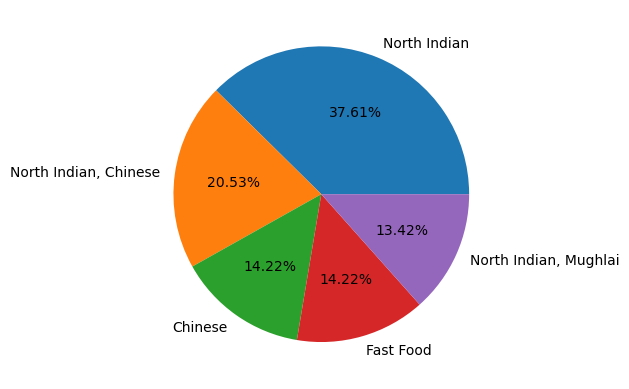

In [47]:
plt.pie(cuisines_values[:5],labels = cuisines_labels[:5],autopct='%1.2f%%')